# <u> Machine Learning Internship at Prodigy InfoTech - House Prediction Sale Price Project </u>

In this project, our objective is to conduct an in-depth exploration and analysis of the House Prediction dataset. We use linear regression model to predict the prices of houses based on some relevent features that affect on House sale price . 

# Importing Important Libraries

In [189]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns 
sns.set_style('darkgrid')

## Load  Train and Test Data

In [190]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

### Get information about Our data

In [191]:
train.info()
print(50*"-")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [192]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [193]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Get Statistical information about our Data

In [194]:
train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [195]:
test.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1459.000000,1455,1232.000000,1459.000000,1459,107,1459,1459,1457,...,1459.000000,1459.000000,3,290,51,1459.000000,1459.000000,1459.000000,1458,1459
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,1,...,NaN,NaN,2,4,3,NaN,NaN,NaN,9,6
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,1114,NaN,NaN,1453,70,934,1311,1457,...,NaN,NaN,2,172,46,NaN,NaN,NaN,1258,1204
mean,2190.000000,57.378341,NaN,68.580357,9819.161069,NaN,NaN,NaN,NaN,NaN,...,17.064428,1.744345,NaN,NaN,NaN,58.167923,6.104181,2007.769705,NaN,NaN
std,421.321334,42.746880,NaN,22.376841,4955.517327,NaN,NaN,NaN,NaN,NaN,...,56.609763,30.491646,NaN,NaN,NaN,630.806978,2.722432,1.301740,NaN,NaN
min,1461.000000,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN
25%,1825.500000,20.000000,NaN,58.000000,7391.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN
50%,2190.000000,50.000000,NaN,67.000000,9399.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN
75%,2554.500000,70.000000,NaN,80.000000,11517.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN


# <u>Preprocessing:- </u>

## Checking duplicates Values

In [196]:
train.duplicated().sum()


0

In [197]:
test.duplicated().sum()

0

 <b> Nice, There is no duplicate values </b>

In [198]:
# Calculate Percentage of null values in training set
missing_percentage_train = (train.isnull().sum() / len(train)) * 100
print("Percentage of missing values for training data:")
print(missing_percentage_train.to_string())



Percentage of missing values for training data:
Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFin

In [199]:
# Percentage of null values in testing set
missing_percentage_test = (test.isnull().sum() / len(test)) * 100
print("Percentage of missing values for testing data:")
print(missing_percentage_test.to_string())

Percentage of missing values for testing data:
Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
Street            0.000000
Alley            92.666210
LotShape          0.000000
LandContour       0.000000
Utilities         0.137080
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.068540
Exterior2nd       0.068540
MasVnrType       61.274846
MasVnrArea        1.028101
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          3.015764
BsmtCond          3.084304
BsmtExposure      3.015764
BsmtFinType1      2.878684
BsmtFinSF1        0.068540
BsmtFinT

## Drop Columns with high missing values percentage

<I> we drop Columns that exceeds 50% of Missing Values and the other will be imputed with <u> Mean and Mode </u></I>

In [200]:
train.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
test.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

## Impute Missing Values 

In [201]:
# Identify numerical and categorical columns for training Columns
train_numerical_cols = train.select_dtypes(include=[np.number]).columns
train_categorical_cols = train.select_dtypes(include=[object]).columns

# Impute missing values for numerical columns with mean
for col in train_numerical_cols:
    train[col].fillna(train[col].mean(), inplace=True)
    

# Impute missing values for categorical columns with mode
for col in train_categorical_cols:
    train[col].fillna(train[col].mode()[0], inplace=True)


# Identify numerical and categorical columns for Testing  Columns
test_numerical_cols = test.select_dtypes(include=[np.number]).columns
test_categorical_cols = test.select_dtypes(include=[object]).columns

# Impute missing values for numerical columns with mean
for col in test_numerical_cols:
   test[col].fillna(test[col].mean(), inplace=True)
    

# Impute missing values for categorical columns with mode
for col in test_categorical_cols:
    test[col].fillna(test[col].mode()[0], inplace=True)




C:\Users\engyo\AppData\Local\Temp\ipykernel_1252\612869699.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mean(), inplace=True)
C:\Users\engyo\AppData\Local\Temp\ipykernel_1252\612869699.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

## Check Missing Values 

In [202]:
# Display the percentage of missing values after imputation
missing_percentage_train_after = (train.isnull().sum() / len(train)) * 100
print("Percentage of missing values for training data after imputation:")
print(missing_percentage_train_after.sum())

missing_percentage_test_after = (test.isnull().sum() / len(test)) * 100
print("Percentage of missing values for testing data after imputation:")
print(missing_percentage_test_after.sum())

Percentage of missing values for training data after imputation:
0.0
Percentage of missing values for testing data after imputation:
0.0


## Handling outliers from train data

In [203]:
def remove_outliers_IQR(original_data, train_numerical_cols, threshold=1.5):
    for col in train_numerical_cols:
        q1 = original_data[col].quantile(0.25)
        q3 = original_data[col].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - threshold * IQR
        upper_bound = q3 + threshold * IQR
        outliers_mask = (original_data[col] < lower_bound) | (original_data[col] > upper_bound)
        original_data = original_data[~outliers_mask].reset_index(drop=True)
    return original_data

# Applying the function to remove outliers
new_train = remove_outliers_IQR(train, train_numerical_cols)

# Displaying the number of outliers removed from each numerical column
for col in train_numerical_cols:
    outliers_removed = len(train[col]) - len(new_train[col])
    print(f"Number of outliers removed in {col}: {outliers_removed}")

Number of outliers removed in Id: 912
Number of outliers removed in MSSubClass: 912
Number of outliers removed in LotFrontage: 912
Number of outliers removed in LotArea: 912
Number of outliers removed in OverallQual: 912
Number of outliers removed in OverallCond: 912
Number of outliers removed in YearBuilt: 912
Number of outliers removed in YearRemodAdd: 912
Number of outliers removed in MasVnrArea: 912
Number of outliers removed in BsmtFinSF1: 912
Number of outliers removed in BsmtFinSF2: 912
Number of outliers removed in BsmtUnfSF: 912
Number of outliers removed in TotalBsmtSF: 912
Number of outliers removed in 1stFlrSF: 912
Number of outliers removed in 2ndFlrSF: 912
Number of outliers removed in LowQualFinSF: 912
Number of outliers removed in GrLivArea: 912
Number of outliers removed in BsmtFullBath: 912
Number of outliers removed in BsmtHalfBath: 912
Number of outliers removed in FullBath: 912
Number of outliers removed in HalfBath: 912
Number of outliers removed in BedroomAbvGr: 

Here, we are using a function designed to detect and eliminate outliers. This function accepts three parameters: the dataset, the selected numerical columns, and an optional threshold value (default set to 1.5).

For each numerical column, the function computes the first quartile (q1), third quartile (q3), and interquartile range (IQR). Then, it establishes lower and upper bounds based on the IQR and the provided threshold. Using these bounds, a mask (outliers_mask) is created to identify rows containing outlier values.

The dataset is then updated by removing these outlier rows, and the index is reset using "reset_index" to ensure that the outlier indices are dropped. Finally, the updated dataset is returned.

At the end, the number of removed rows is printed.

## Get Statistical information after Removing Outliers 

In [204]:
new_train.describe(include='number')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.0,548.0,548.0,548.0,548.0,548.000000,548.000000,548.000000
mean,738.819343,49.105839,68.576908,9100.343066,6.231752,5.368613,1983.169708,1989.204380,75.369391,429.483577,...,90.144161,40.246350,0.0,0.0,0.0,0.0,0.0,6.324818,2007.784672,177890.208029
std,418.421232,31.660674,13.391548,2593.927851,1.235939,0.707159,25.252264,19.607907,106.053404,401.742272,...,97.322300,43.943285,0.0,0.0,0.0,0.0,0.0,2.658566,1.322420,54472.843763
min,1.000000,20.000000,30.000000,2887.000000,2.000000,4.000000,1910.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,37900.000000
25%,382.750000,20.000000,60.750000,7683.000000,5.000000,5.000000,1965.000000,1972.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,136975.000000
50%,760.000000,50.000000,70.049958,9000.000000,6.000000,5.000000,1995.500000,1999.000000,0.000000,422.500000,...,99.000000,33.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,175700.000000
75%,1101.500000,60.000000,75.000000,10676.750000,7.000000,6.000000,2004.000000,2005.000000,143.000000,725.000000,...,165.000000,63.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,212225.000000
max,1456.000000,120.000000,109.000000,16770.000000,10.000000,7.000000,2009.000000,2010.000000,420.000000,1619.000000,...,379.000000,162.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,328900.000000


In [205]:
new_train.describe(include='object')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,548,548,548,548,548,548,548,548,548,548,...,548,548,548,548,548,548,548,548,548,548
unique,4,2,4,4,1,5,2,23,8,1,...,4,4,5,4,3,3,4,3,9,5
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
freq,474,547,326,509,548,412,534,112,491,548,...,519,284,534,406,200,533,539,529,460,443


# <u>Visualization and Analysis:-</u>

# Distributions of Numerical columns

In this step, we plot histograms for various numerical columns within our dataset to gain a deeper understanding of the data distribution.

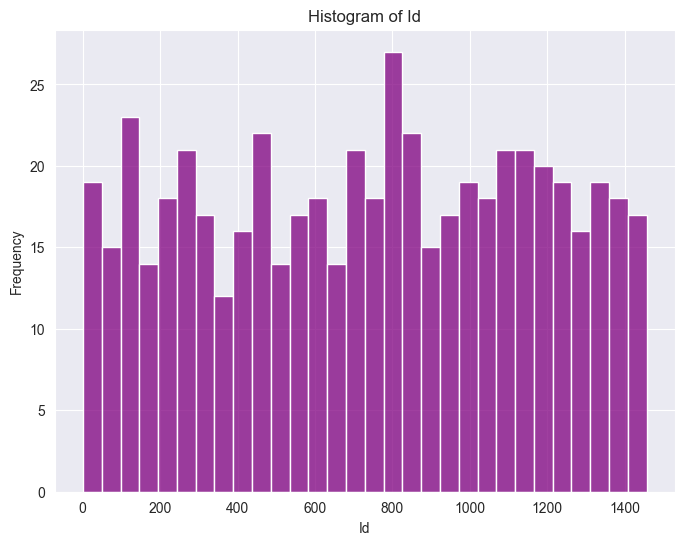

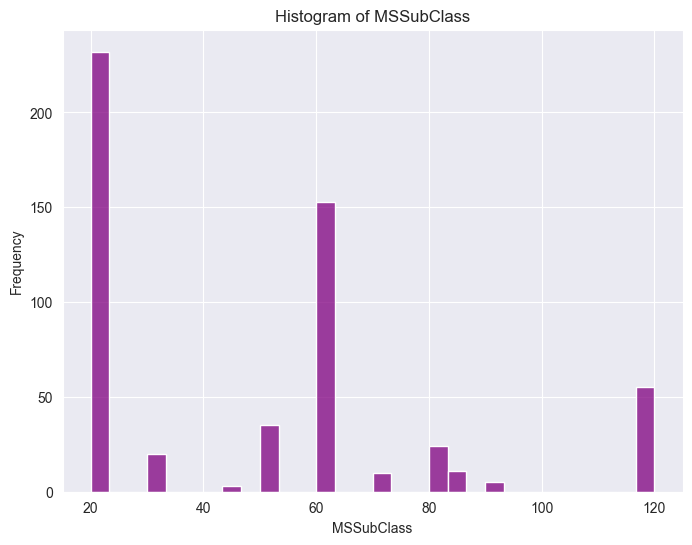

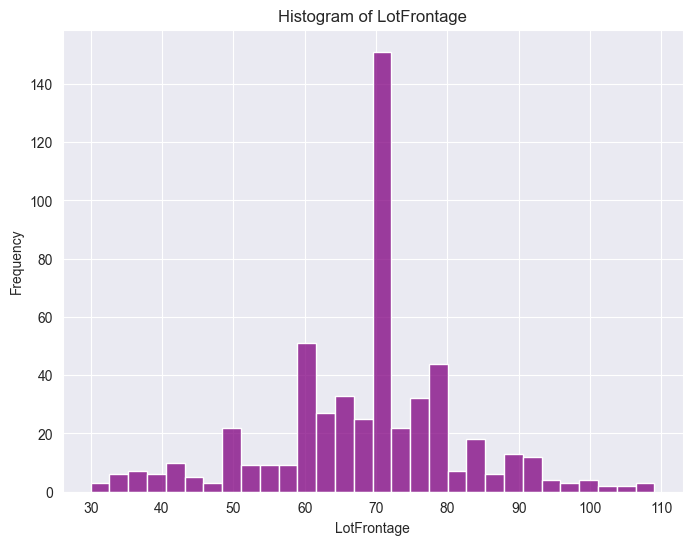

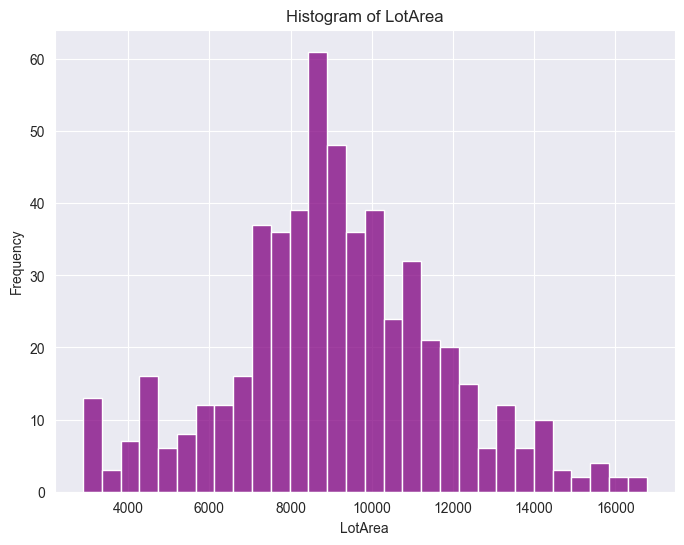

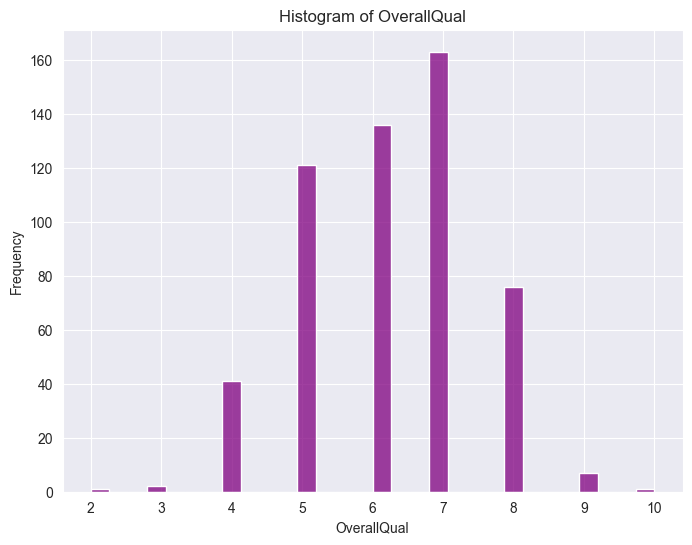

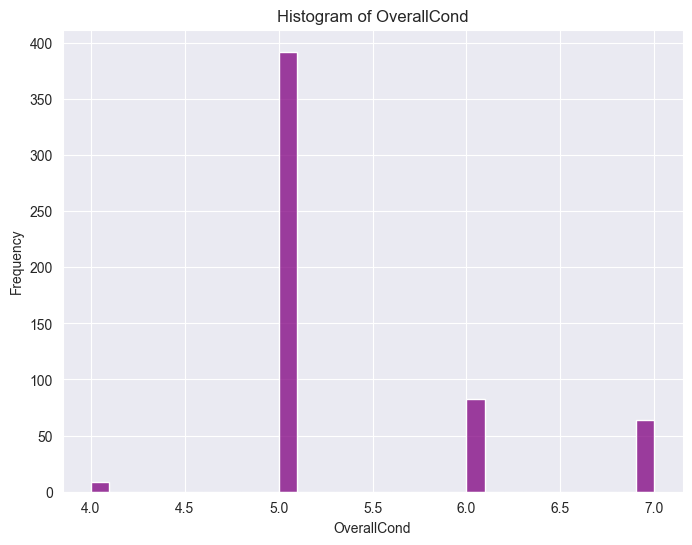

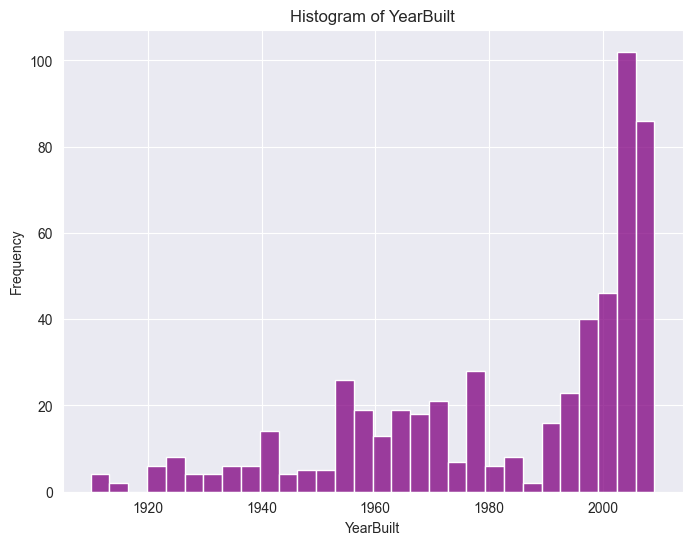

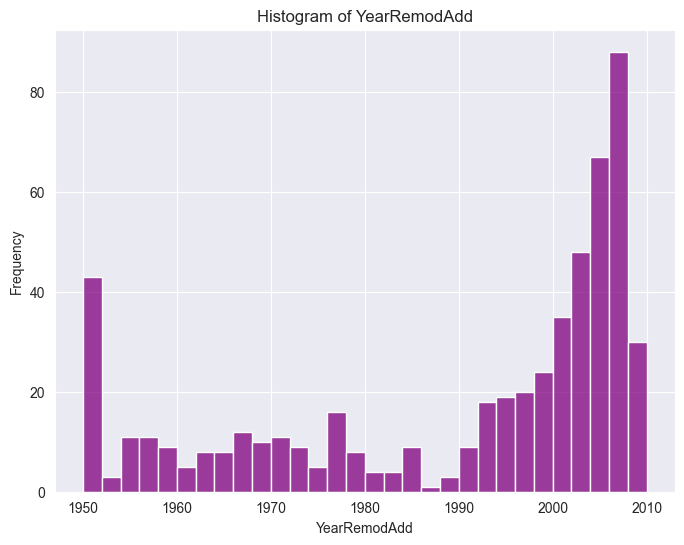

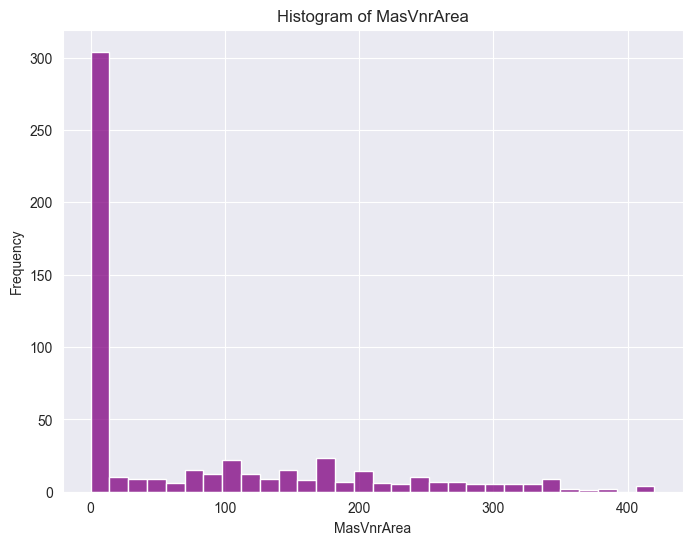

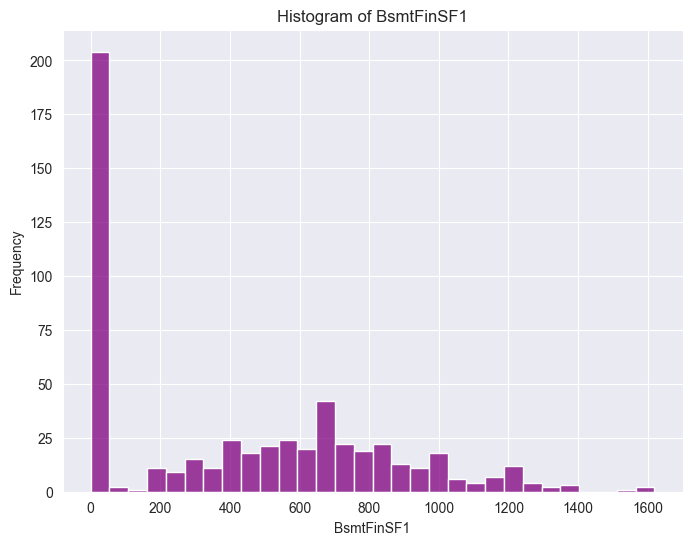

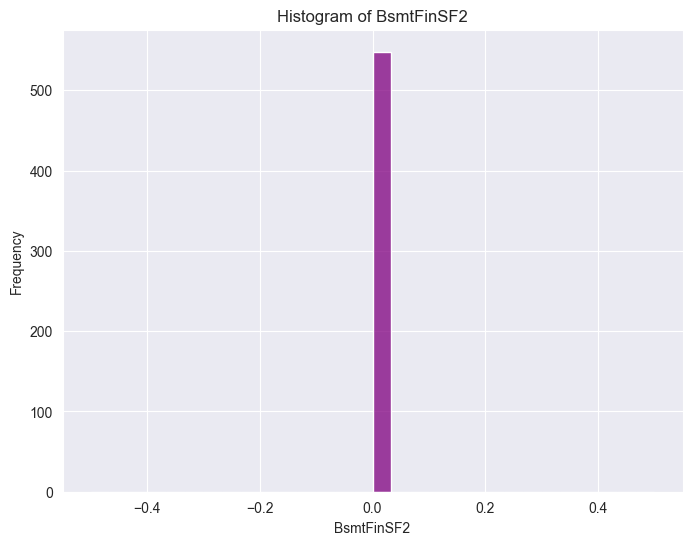

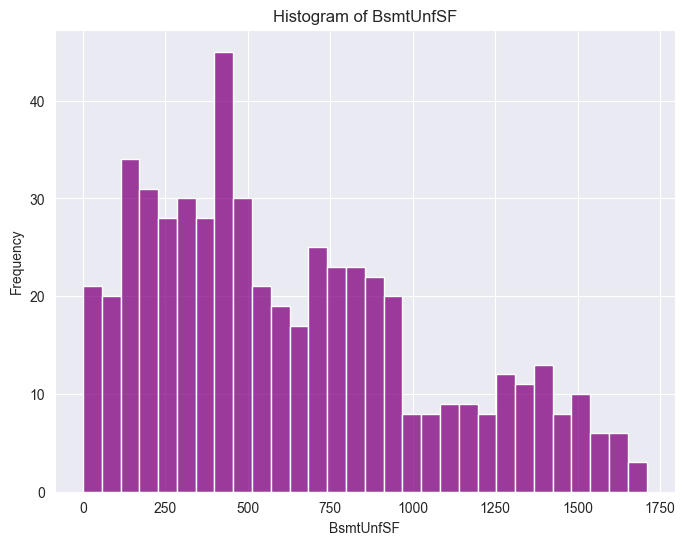

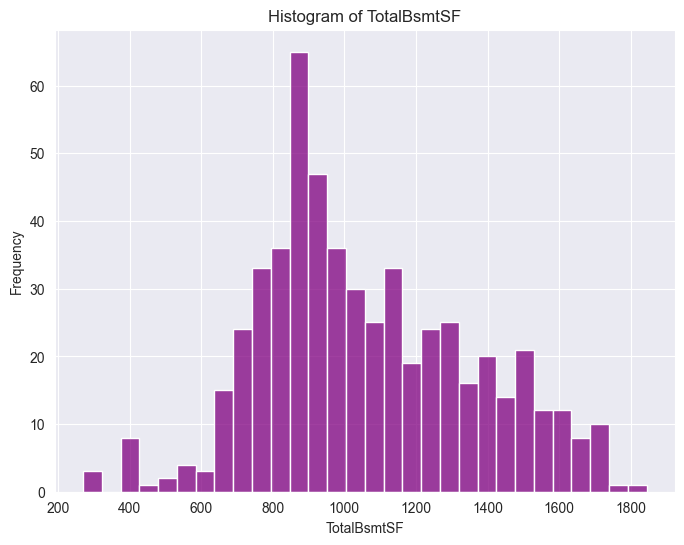

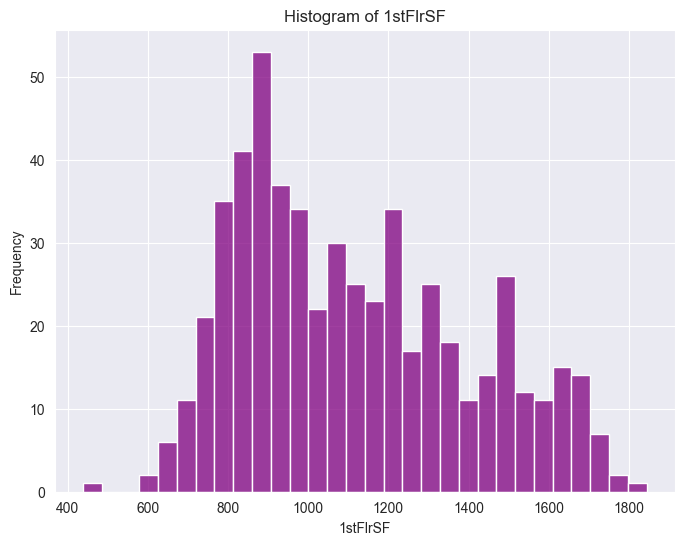

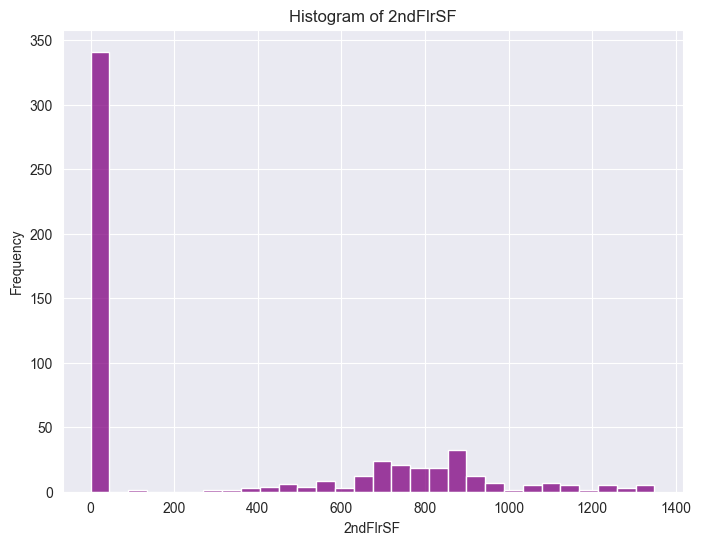

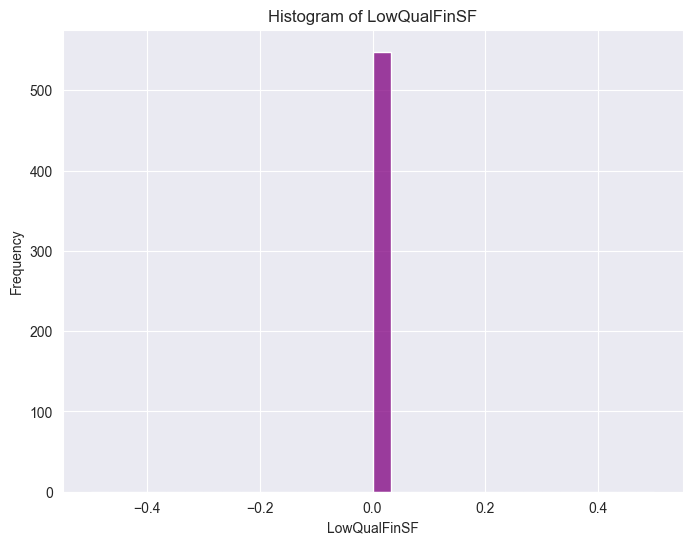

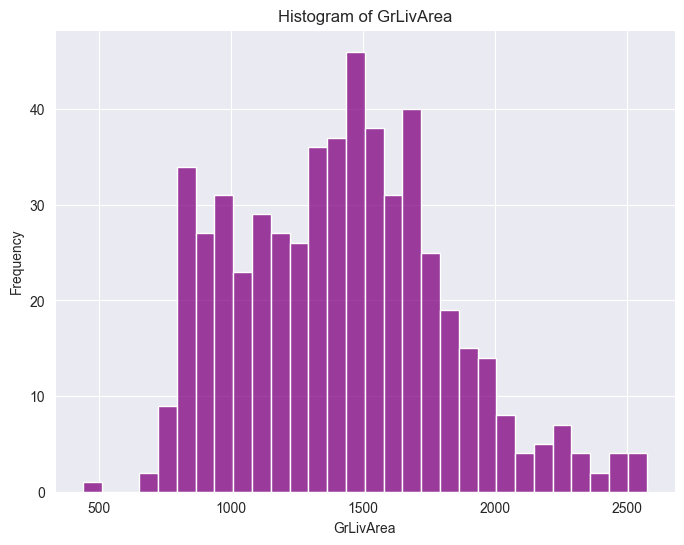

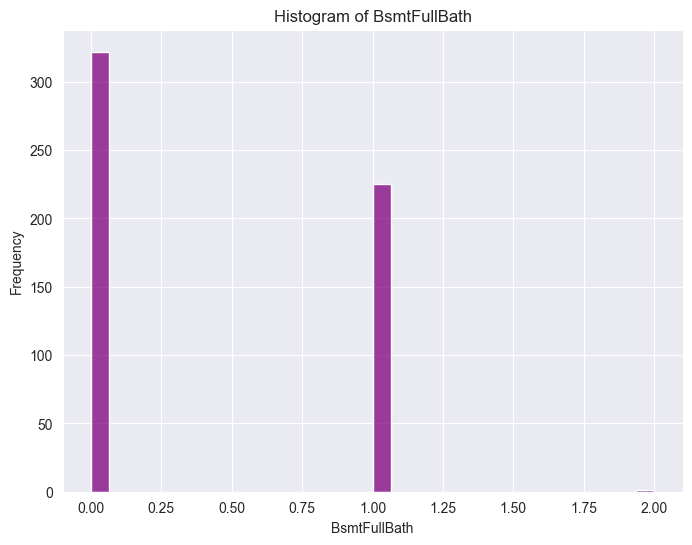

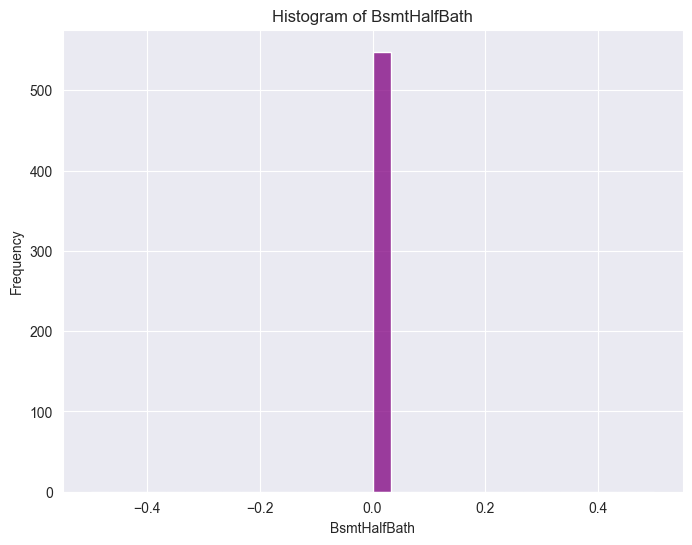

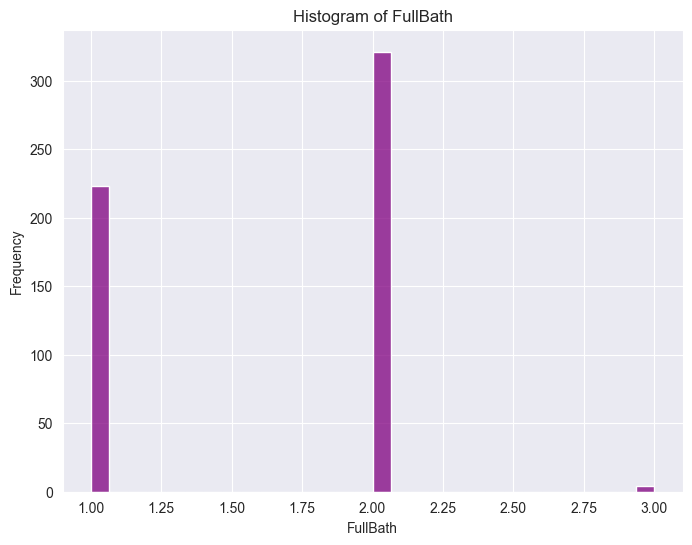

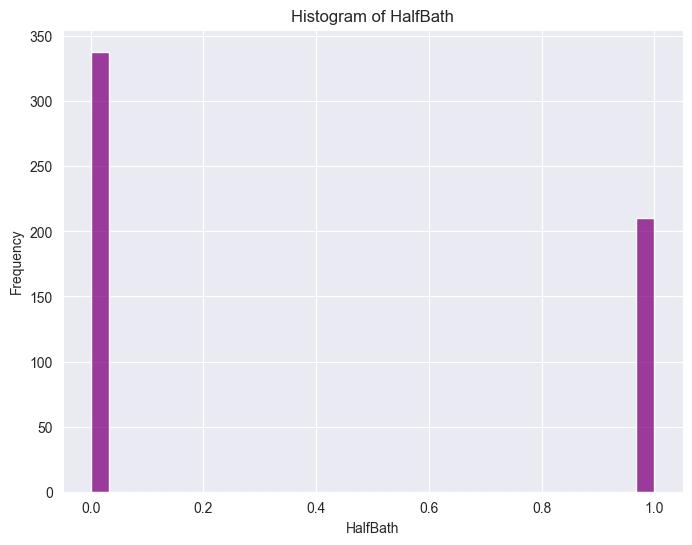

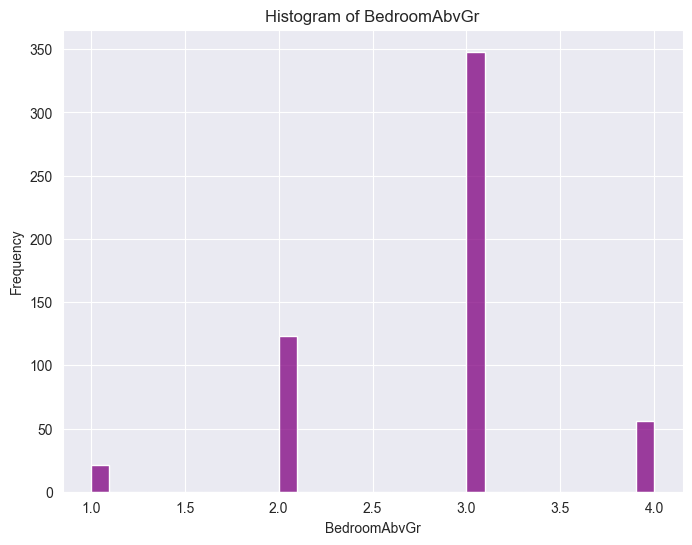

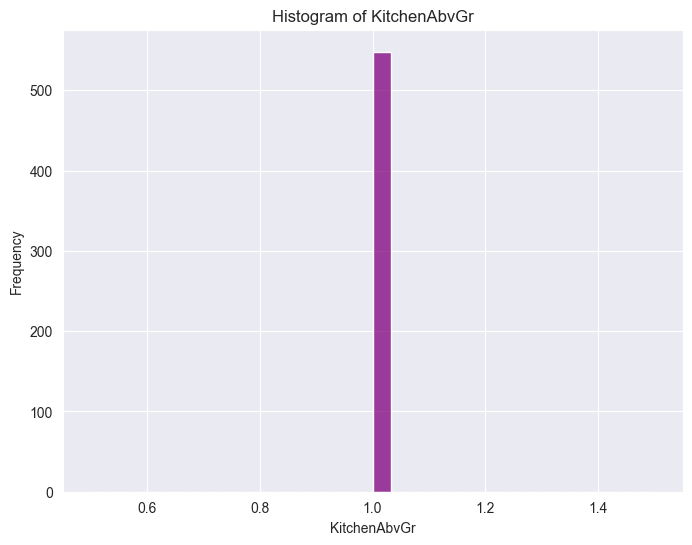

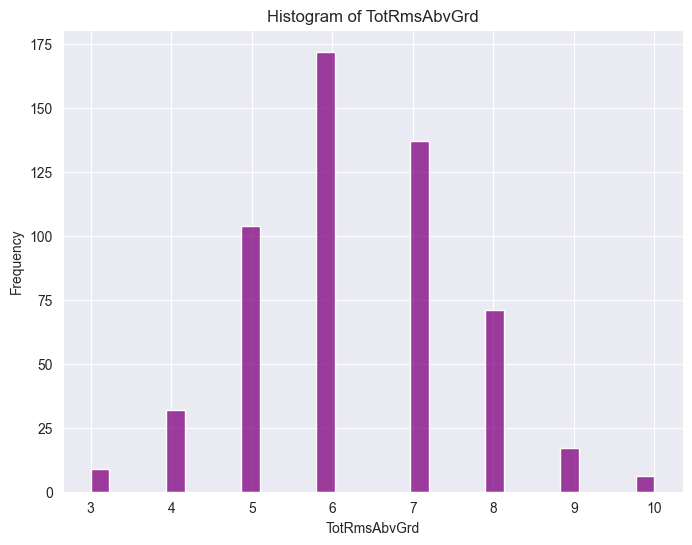

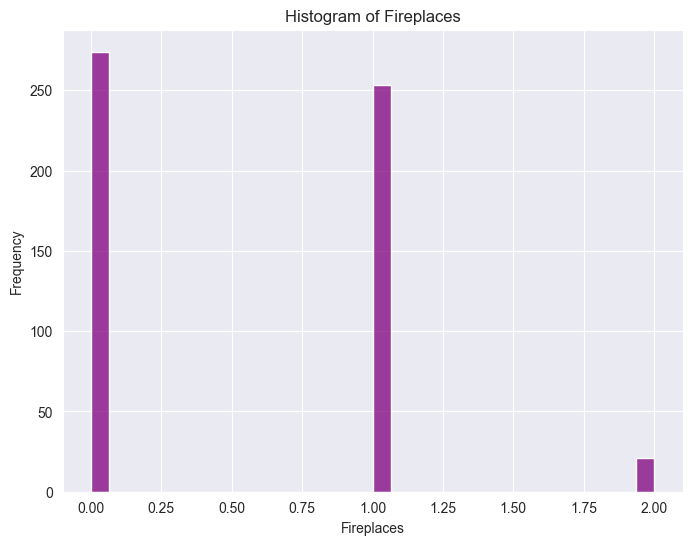

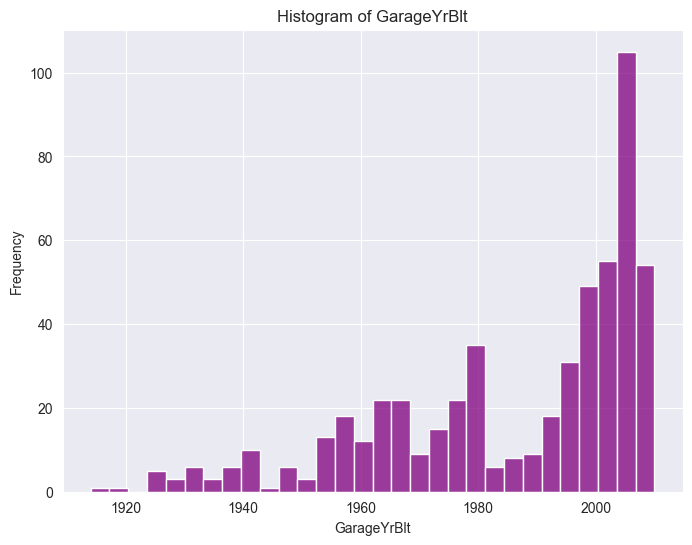

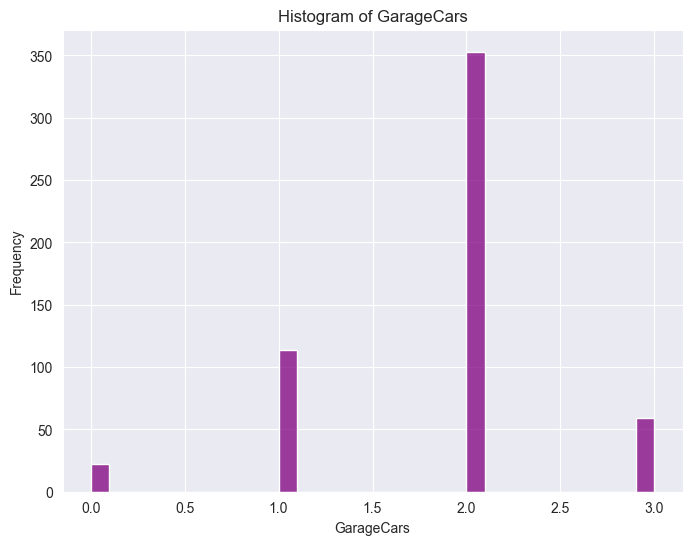

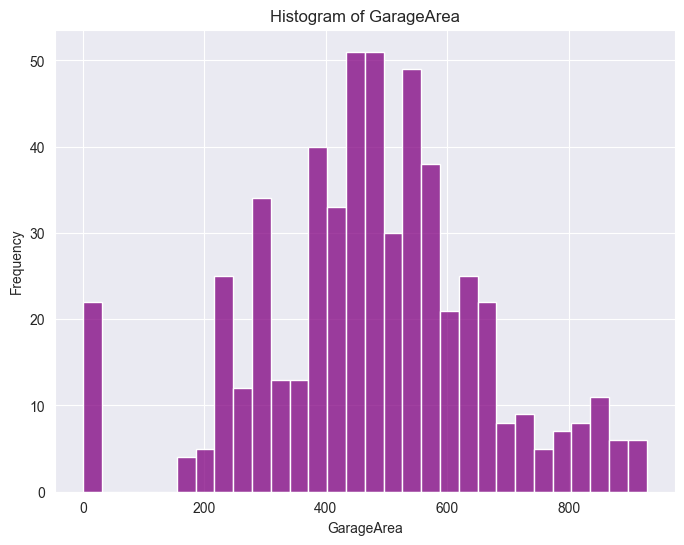

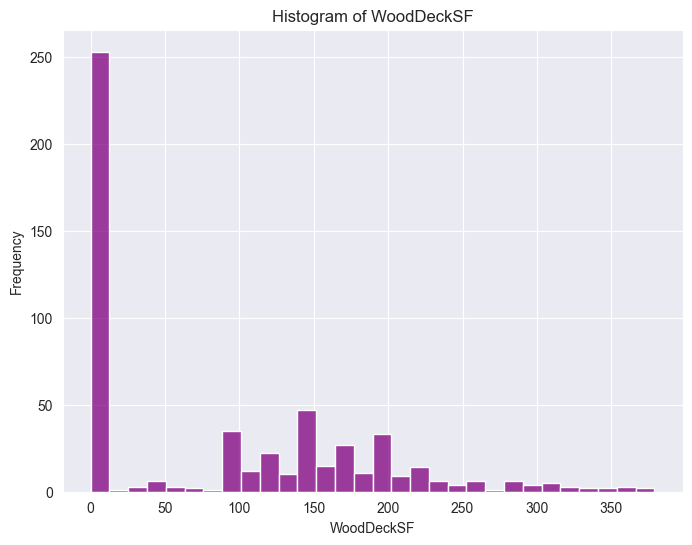

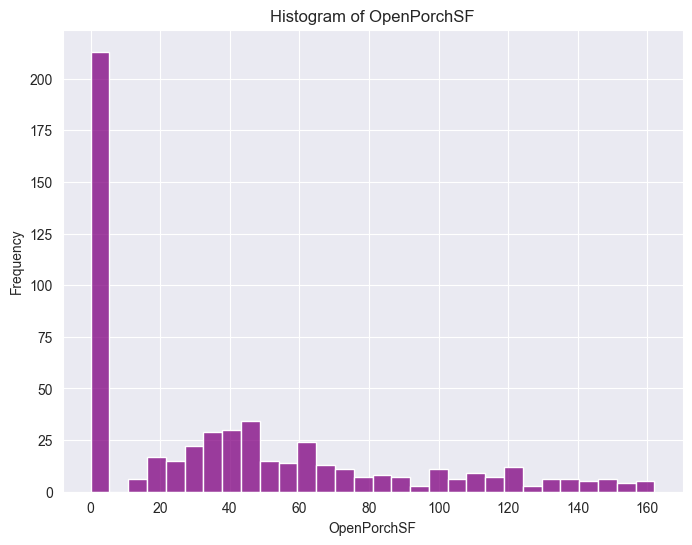

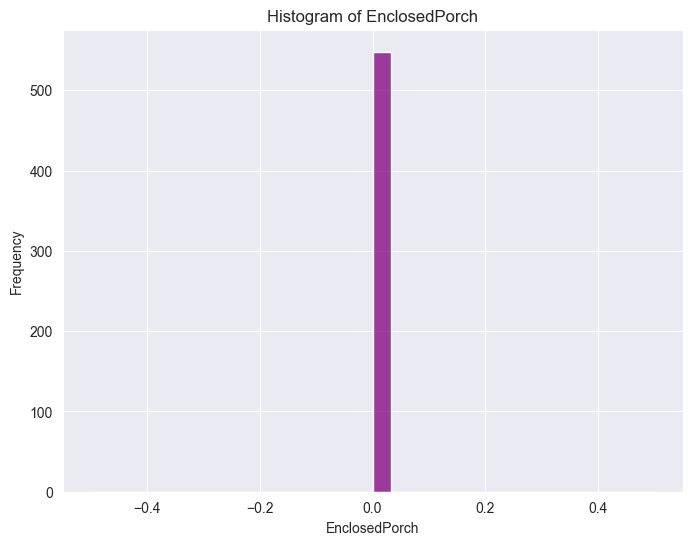

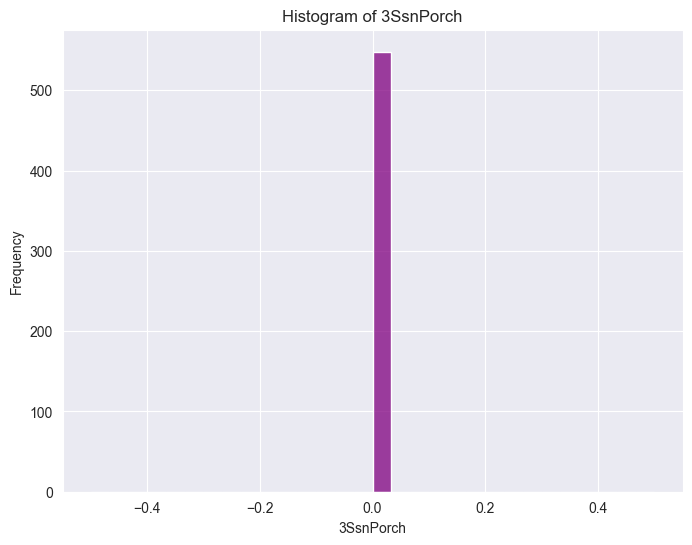

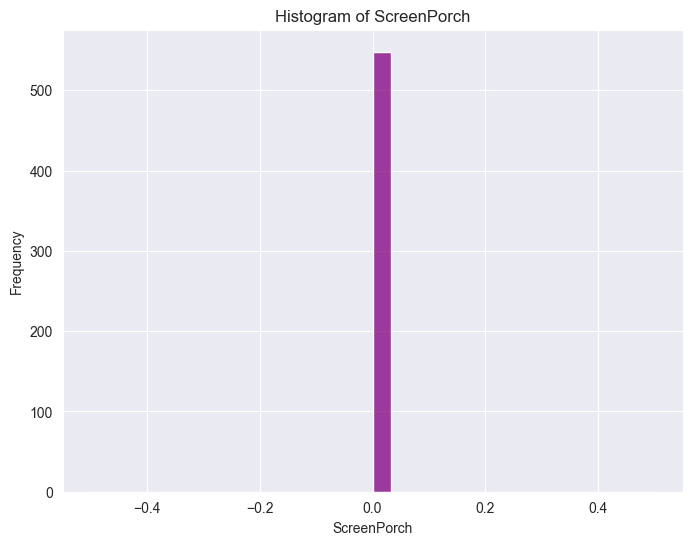

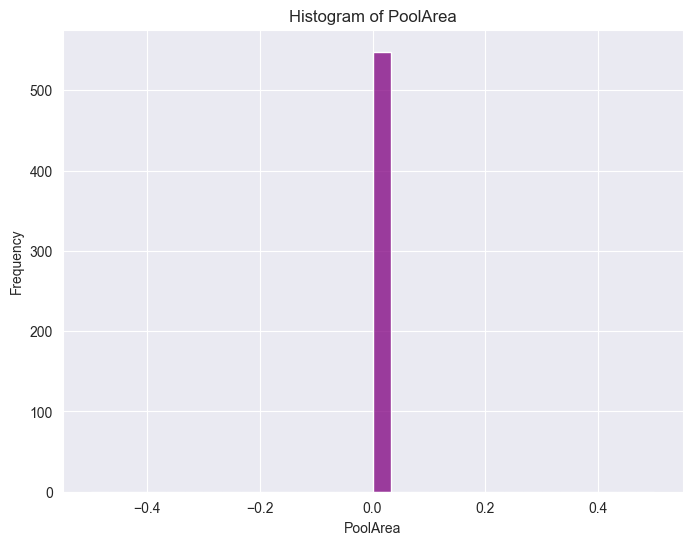

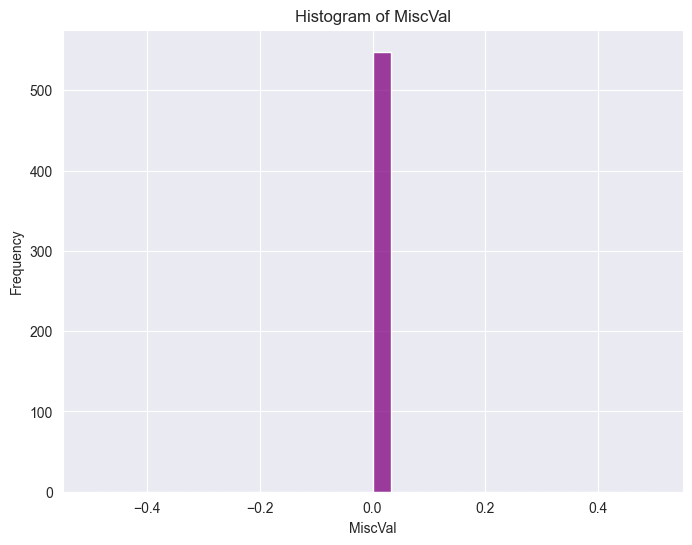

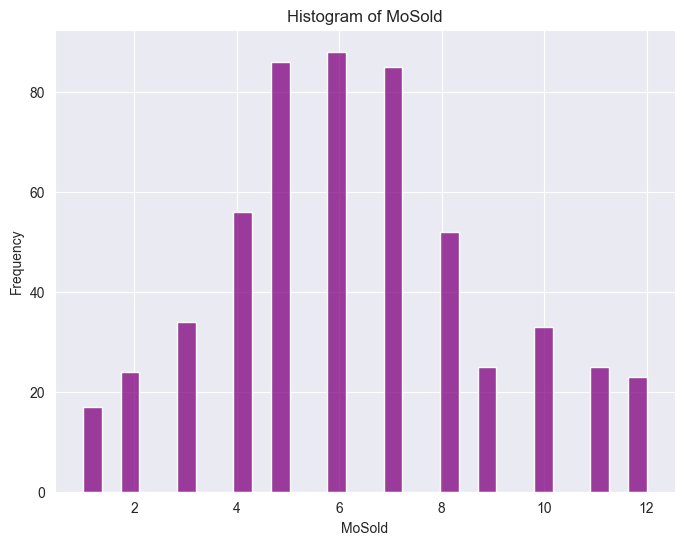

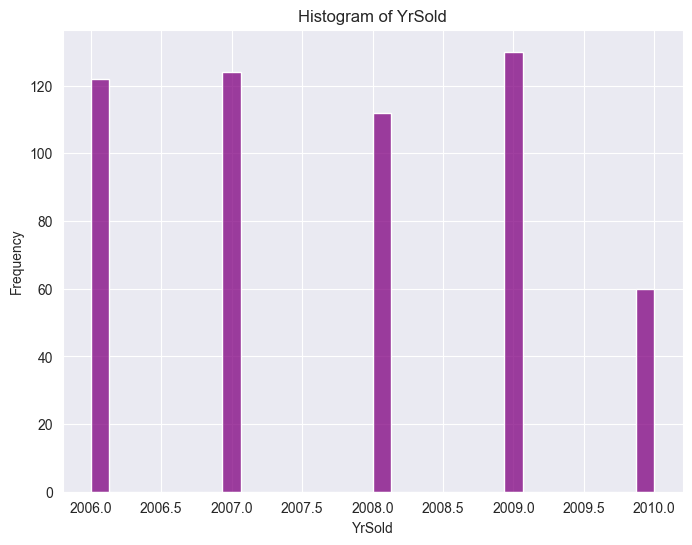

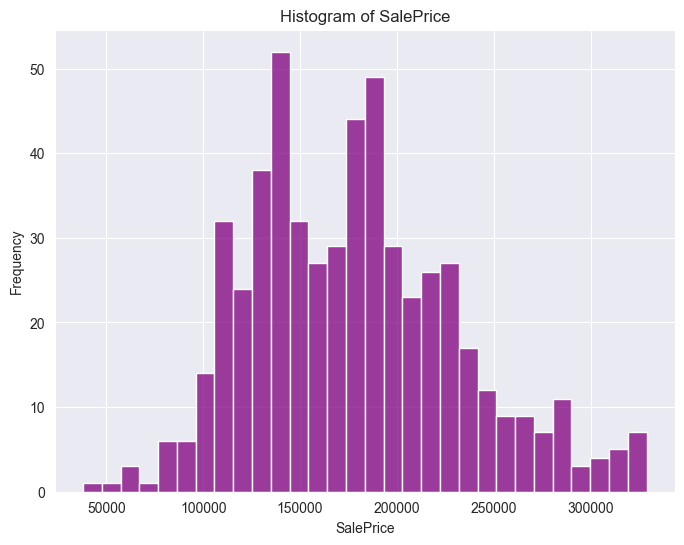

In [206]:
for col in train_numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(new_train[col], bins=30,color='purple')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Correlation between numerical features

<Axes: title={'center': 'Heatmap showing correlation for all numerical features'}>

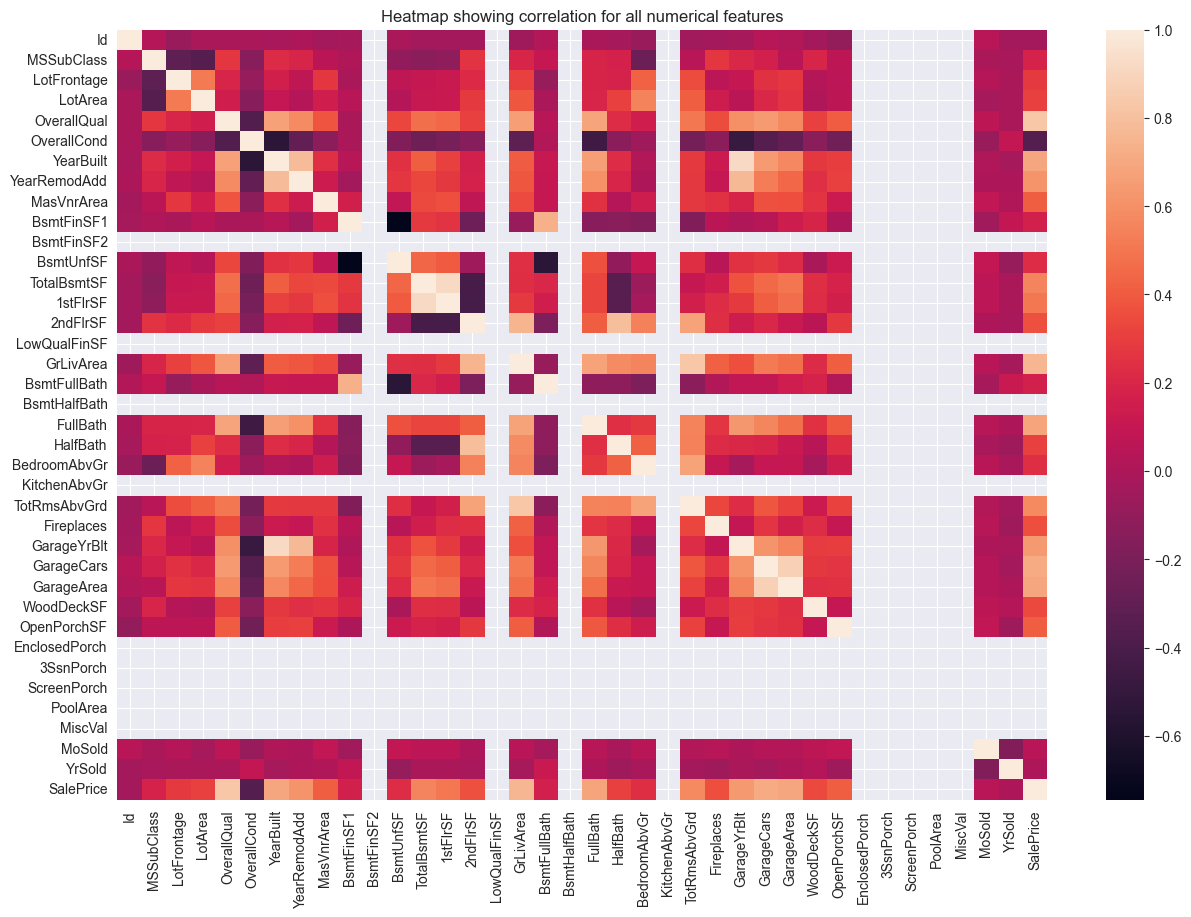

In [207]:
corr_matrix = new_train[train_numerical_cols].corr()
plt.figure(figsize = (15,10))
plt.title("Heatmap showing correlation for all numerical features")
sns.heatmap(corr_matrix)

# Selecting relevant columns to the target

Based on the insights gained from our preprocessing steps, we proceed to select the most relevant and useful features for our analysis.

Top features correlated with 'SalePrice':
OverallQual      0.834155
GrLivArea        0.758951
GarageCars       0.712544
YearBuilt        0.692705
GarageArea       0.688153
FullBath         0.680493
GarageYrBlt      0.636252
YearRemodAdd     0.612175
TotRmsAbvGrd     0.572121
TotalBsmtSF      0.554271
1stFlrSF         0.507753
MasVnrArea       0.411090
OpenPorchSF      0.409521
2ndFlrSF         0.365972
Fireplaces       0.356323
WoodDeckSF       0.338591
LotArea          0.302663
HalfBath         0.300508
LotFrontage      0.281854
BedroomAbvGr     0.234447
BsmtUnfSF        0.229988
MSSubClass       0.178116
BsmtFullBath     0.168721
BsmtFinSF1       0.166024
MoSold           0.051561
YrSold           0.000136
Id              -0.036886
OverallCond     -0.361252
BsmtFinSF2            NaN
LowQualFinSF          NaN
BsmtHalfBath          NaN
KitchenAbvGr          NaN
EnclosedPorch         NaN
3SsnPorch             NaN
ScreenPorch           NaN
PoolArea              NaN
MiscVal               

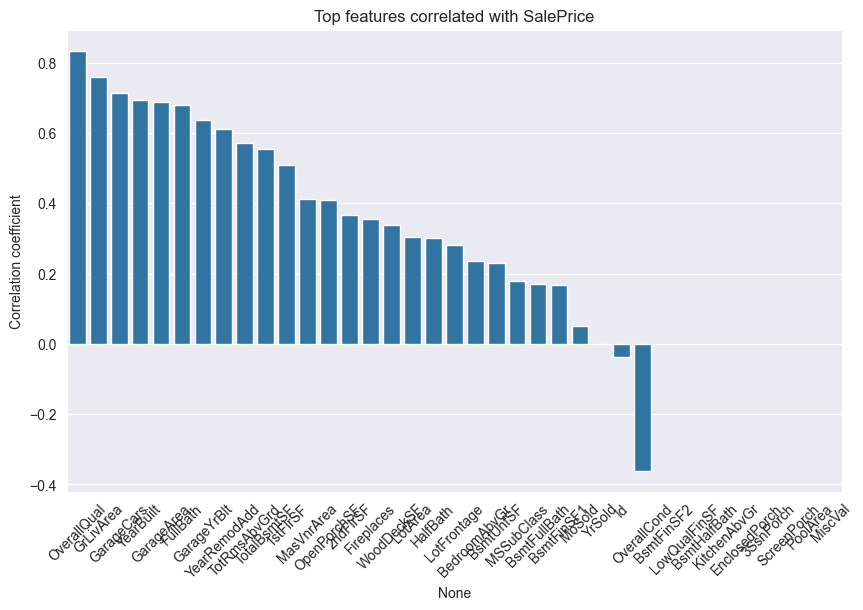

In [208]:

# Calculate the correlation matrix
corr_matrix = new_train[train_numerical_cols].corr()

# Extract the correlations with 'SalePrice'
saleprice_corr = corr_matrix["SalePrice"].drop("SalePrice")  # Exclude self-correlation

# Sort the correlations and get the highest ones
top_correlations = saleprice_corr.sort_values(ascending=False)

# Display the top correlations with 'SalePrice'
print("Top features correlated with 'SalePrice':")
print(top_correlations)

# Optionally, plot the top correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_correlations.index, y=top_correlations.values)
plt.title("Top features correlated with SalePrice")
plt.ylabel("Correlation coefficient")
plt.xticks(rotation=45)
plt.show()

In [209]:
cdf=['OverallQual','GrLivArea','GarageCars','YearBuilt','GarageArea','FullBath','SalePrice']
cdf_train = new_train[cdf]

In [210]:
cdf_train

,OverallQual,GrLivArea,GarageCars,YearBuilt,GarageArea,FullBath,SalePrice
0,7,1710,2,2003,548,2,208500
1,7,1786,2,2001,608,2,223500
2,8,2198,3,2000,836,2,250000
3,8,1694,2,2004,636,2,307000
4,5,1040,1,1965,384,1,129500
...,...,...,...,...,...,...,...
543,7,1422,2,2004,626,2,179600
544,4,1346,1,1910,384,1,112000
545,8,1578,3,2008,840,2,287090
546,7,1221,2,2004,400,2,185000


## Perform Scaling

In [211]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cdf_train= pd.DataFrame(scaler.fit_transform(cdf_train), columns=cdf_train.columns)

In [212]:
cdf_train

,OverallQual,GrLivArea,GarageCars,YearBuilt,GarageArea,FullBath,SalePrice
0,0.625,0.595506,0.666667,0.939394,0.590517,0.5,0.586254
1,0.625,0.631086,0.666667,0.919192,0.655172,0.5,0.637801
2,0.750,0.823970,1.000000,0.909091,0.900862,0.5,0.728866
3,0.750,0.588015,0.666667,0.949495,0.685345,0.5,0.924742
4,0.375,0.281835,0.333333,0.555556,0.413793,0.0,0.314777
...,...,...,...,...,...,...,...
543,0.625,0.460674,0.666667,0.949495,0.674569,0.5,0.486942
544,0.250,0.425094,0.333333,0.000000,0.413793,0.0,0.254639
545,0.750,0.533708,1.000000,0.989899,0.905172,0.5,0.856323
546,0.625,0.366573,0.666667,0.949495,0.431034,0.5,0.505498


## Splitting the cdf data into train and test

In [213]:
X = cdf_train.drop(columns = 'SalePrice')
y = cdf_train['SalePrice']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3,random_state=42)

## <u>Applying Linear Regression Algorithm  :- </u>

### <I> Train our Model </I>

In [214]:
model = LinearRegression()
model.fit(train_X, train_y)


LinearRegression()

### <I> Test our Model </I>

In [215]:
# Make predictions on the test set
y_pred = model.predict(test_X)

### <I> Evaluate our Model using MSE (Mean Square Error) </I>

In [216]:
mse = mean_squared_error(test_y, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0059097865420728295


### <I> Model Coefficients :- </I>

In [217]:
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

Model Coefficients:
OverallQual: 0.4504240293662034
GrLivArea: 0.37680760996465845
GarageCars: -0.013291787683437445
YearBuilt: 0.1820058822350239
GarageArea: 0.2194846551530315
FullBath: -0.06857731890433652


# <I> <B>Function to take user inputs and make predictions<B> </I>

In [221]:
def predict_sale_price(model, feature_names):
    user_input = {}
    for feature in feature_names:
        while True:
            value = input(f"Enter value for {feature}: ")
            try:
                # Try converting input to float
                value = float(value)
                user_input[feature] = value
                break  # Break the loop if conversion succeeds
            except ValueError:
                print("Please enter a numeric value.")

    # Convert user input to DataFrame
    input_df = pd.DataFrame([user_input])

    # Predict the sale price
    predicted_price = model.predict(input_df)

    return user_input, predicted_price[0]  # Return both user input and predicted price

# Get user inputs and predict the sale price
user_input, predicted_price = predict_sale_price(model, X.columns)

# Print user input and predicted sale price
print("\nUser Input:")
for feature, value in user_input.items():
    print(f"{feature}: {value}")
print(f"\nPredicted Sale Price: {predicted_price}")


User Input:
OverallQual: 90.0
GrLivArea: 550.0
GarageCars: 2.0
YearBuilt: 1996.0
GarageArea: 225.0
FullBath: 3.0

Predicted Sale Price: 660.0674678254483
